<a href="https://colab.research.google.com/github/nathanaelrorie/UE-Pitch-Eliminator/blob/main/Pitch_Eliminator_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybaseball

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.0/420.0 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 KB 42.6 MB/s eta 0:00:00


In [ ]:
#Importing the libraries
import pandas as pd
import pickle
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pybaseball as pyb
from pybaseball import statcast
import xgboost as xgb
import numpy as np
from scipy.stats import rankdata
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.lines
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

In [ ]:
#from google.colab import drive

#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/012723 Intersquad.csv", usecols=[1,5,19,21,40,41])

In [ ]:
# import the data
#df = pd.read_csv("/content/drive/MyDrive/012723 Intersquad.csv",low_memory=False)

In [ ]:
#Enter Range of Files we have available
files_available = np.arange(1, 19, 1)
print(files_available)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [ ]:
#Function reads in files from GitHub
def read_file(snap):
  print("Reading file: "+str(snap))
  #filename = 'https://raw.githubusercontent.com/CDavisBelmont/illustris3_135/main/illustris_3_%03d.txt' %snap
  filename = 'https://raw.githubusercontent.com/nathanaelrorie/UE-Pitch-Eliminator/main/Evansville_%02d.csv' %snap
  df = pd.read_csv(filename)
  print("yay")
  return df

In [ ]:
#Combines all files into one biug file
def build_total_df(files_to_add):
  snapmin = np.min(files_available)
  for i, snap in enumerate(files_available):
    print(snap)
    df = read_file(snap)
    df["snap"] = snap
    if snap == snapmin:
      print('ok')
      master_df = df
    else:
      master_df = master_df.append(df, ignore_index=True)
  return master_df

In [ ]:
read_file(3)

Reading file: 3
yay


,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
0,1,2023-02-19,13:01:45.56,1,1,"Stewart, Grayson",1000093879,Right,TRO_TRJ,"Fougerousse, Kip",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
1,2,2023-02-19,13:02:02.34,1,2,"Stewart, Grayson",1000093879,Right,TRO_TRJ,"Fougerousse, Kip",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
2,3,2023-02-19,13:02:18.64,1,3,"Stewart, Grayson",1000093879,Right,TRO_TRJ,"Fougerousse, Kip",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
3,4,2023-02-19,13:02:39.91,1,4,"Stewart, Grayson",1000093879,Right,TRO_TRJ,"Fougerousse, Kip",...,-71.83232,9.80547,High,High,High,NaN,NaN,High,Low,Medium
4,5,2023-02-19,13:03:12.52,2,1,"Stewart, Grayson",1000093879,Right,TRO_TRJ,"Shallenberger, Mark",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,2023-02-19,16:35:10.86,6,2,"Manning, Noah",1000138313,Right,TRO_TRJ,"Fougerousse, Kip",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
339,340,2023-02-19,16:35:34.17,6,3,"Manning, Noah",1000138313,Right,TRO_TRJ,"Fougerousse, Kip",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
340,341,2023-02-19,16:35:52.68,6,4,"Manning, Noah",1000138313,Right,TRO_TRJ,"Fougerousse, Kip",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
341,342,2023-02-19,16:36:02.68,6,5,"Manning, Noah",1000138313,Right,TRO_TRJ,"Fougerousse, Kip",...,NaN,NaN,Low,Low,Low,NaN,NaN,NaN,NaN,NaN


In [ ]:
master_df = build_total_df(files_available)

1
Reading file: 1
yay
ok
2
Reading file: 2
yay
3
Reading file: 3


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
4
Reading file: 4


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
5
Reading file: 5


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
6
Reading file: 6


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
7
Reading file: 7


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
8
Reading file: 8
yay


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)
<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


9
Reading file: 9
yay
10
Reading file: 10


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
11
Reading file: 11


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
12
Reading file: 12


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
13
Reading file: 13


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
14
Reading file: 14


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
15
Reading file: 15


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
16
Reading file: 16


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
17
Reading file: 17


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay
18
Reading file: 18


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


yay


<ipython-input-8-716f84c8ff40>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(df, ignore_index=True)


In [ ]:
master_df.head()

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,snap
0,1,2023-02-17,16:02:03.49,1,1,"Fuller, Brady",1000113749,Right,TRO_TRJ,"Fougerousse, Kip",...,NaN,High,High,High,High,Medium,NaN,NaN,NaN,1
1,2,2023-02-17,16:02:47.40,2,1,"Fuller, Brady",1000113749,Right,TRO_TRJ,"Shallenberger, Mark",...,NaN,High,High,High,Medium,Low,NaN,NaN,NaN,1
2,3,2023-02-17,16:03:04.05,2,2,"Fuller, Brady",1000113749,Right,TRO_TRJ,"Shallenberger, Mark",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,1
3,4,2023-02-17,16:03:19.79,2,3,"Fuller, Brady",1000113749,Right,TRO_TRJ,"Shallenberger, Mark",...,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,1
4,5,2023-02-17,16:03:34.97,2,4,"Fuller, Brady",1000113749,Right,TRO_TRJ,"Shallenberger, Mark",...,NaN,High,High,High,Low,Low,NaN,NaN,NaN,1


In [ ]:
#Create a new dataframe with only the columns we want for Analysis
df = master_df[['Pitcher','BatterSide','RelSpeed','Balls','Strikes','TaggedPitchType','PitchCall','SpinRate','RelHeight','RelSide','Extension','InducedVertBreak', 'HorzBreak','PlateLocHeight','PlateLocSide']]
#Rename the columns to be more descriptive
df.rename(columns={'RelSpeed':'Velocity', 'SpinRate':'Spin Rate', 'RelHeight':'Release Height', 'RelSide':'Release Side', 'Extension':'Extension', 'InducedVertBreak':'Induced Vertical Break', 'HorzBreak':'Horizontal Break'}, inplace=True)

<ipython-input-234-77dd27416f80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'RelSpeed':'Velocity', 'SpinRate':'Spin Rate', 'RelHeight':'Release Height', 'RelSide':'Release Side', 'Extension':'Extension', 'InducedVertBreak':'Induced Vertical Break', 'HorzBreak':'Horizontal Break'}, inplace=True)


In [ ]:
#add pitch result column
df.insert(3, 'Pitch Result', df['PitchCall'])

In [ ]:
#delete pitch call column
del df['PitchCall']

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
#change AutoPitchType to Pitch Type
df.rename(columns={'TaggedPitchType':'Pitch Type'}, inplace=True)

In [ ]:
df.head()

,Pitcher,BatterSide,Velocity,Pitch Result,Balls,Strikes,Pitch Type,Spin Rate,Release Height,Release Side,Extension,Induced Vertical Break,Horizontal Break,PlateLocHeight,PlateLocSide
0,"Fuller, Brady",Right,92.25765,InPlay,0,0,Fastball,2290.544503,6.00266,2.59500,5.66361,12.61469,14.70383,1.53135,0.21128
1,"Fuller, Brady",Left,92.75895,FoulBall,0,0,Fastball,2251.691168,6.01959,2.53509,5.58766,12.70839,20.48757,2.85876,0.10094
2,"Fuller, Brady",Left,87.21093,BallCalled,0,1,ChangeUp,1668.123228,5.87919,2.70397,5.01284,11.45040,16.86595,3.17945,1.19343
3,"Fuller, Brady",Left,93.95326,StrikeCalled,1,1,Fastball,2282.989836,6.01139,2.52621,5.44615,11.42894,19.56568,1.87713,1.45228
4,"Fuller, Brady",Left,86.55869,InPlay,1,2,ChangeUp,1673.998724,5.86141,2.63184,5.06906,5.49363,14.73461,1.40572,-0.20874


In [ ]:
#create a fuunction that asks for a pitchers name then converts its from first last to last, first
def get_pitcher_name():
    first_name = input("Enter the pitchers first name: ")
    last_name = input("Enter the pitchers last name: ")
    pitcher_name = last_name + ", " + first_name
    return pitcher_name

In [ ]:
def get_batter_handedness():
  side = input("Enter the batter's handedness: ")
  batter_handedness = side
  return batter_handedness

In [ ]:
def get_num_strikes():
  num = input("Enter # of Strikes: \n Put '2' for 2 Strikes or '<2' for pre 2 Strikes")
  strikes = num
  return strikes

In [ ]:
#get_pitcher_name()

In [ ]:
batter_handedness = get_batter_handedness()

Enter the batter's handedness: Right


In [ ]:
p_count = get_num_strikes()
print(p_count)

Enter # of Strikes: 
 Put '2' for 2 Strikes or '<2' for pre 2 Strikes2
2


In [ ]:
#Filters the dataframe to sort by Righties and Lefties
condition_right = df["BatterSide"] == "Right"
condition_left = df["BatterSide"] == "Left"
if batter_handedness == "Right":
  df = df[condition_right]
  print('R')
elif batter_handedness == "Left":
  df = df[condition_left]
  print('L')

R


In [ ]:
df.head()

,Pitcher,BatterSide,Velocity,Pitch Result,Balls,Strikes,Pitch Type,Spin Rate,Release Height,Release Side,Extension,Induced Vertical Break,Horizontal Break,PlateLocHeight,PlateLocSide
0,"Fuller, Brady",Right,92.25765,InPlay,0,0,Fastball,2290.544503,6.00266,2.59500,5.66361,12.61469,14.70383,1.53135,0.21128
13,"Fuller, Brady",Right,82.24631,BallCalled,0,0,Curveball,2753.749194,5.94985,2.68622,5.10745,-2.37567,-12.14461,1.90557,-1.72524
14,"Fuller, Brady",Right,81.43498,StrikeCalled,1,0,Curveball,1302.070586,5.99434,2.76029,5.00896,-0.87095,-4.37315,1.56867,-0.69209
15,"Fuller, Brady",Right,91.56415,StrikeCalled,1,1,Fastball,2335.160093,6.02888,2.60708,5.58249,7.37272,19.25245,1.50908,-0.24204
16,"Fuller, Brady",Right,82.72405,StrikeSwinging,1,2,Curveball,2644.605798,5.92904,2.75624,5.15141,-0.91835,-11.26115,1.79596,-1.92665


In [ ]:
#Filter the dataframe to sort by count structure
condition_twok = df["Strikes"] == 2
condition_onek = df["Strikes"] == 1
condition_zerok = df["Strikes"] == 0
if p_count == "2":
  df = df[condition_twok]
  print(2)
elif p_count == "<2":
  df = df[condition_zerok | condition_onek]
  print("<2")
else :
  print("null")

2


In [ ]:
df.head()

,Pitcher,BatterSide,Velocity,Pitch Result,Balls,Strikes,Pitch Type,Spin Rate,Release Height,Release Side,Extension,Induced Vertical Break,Horizontal Break,PlateLocHeight,PlateLocSide
16,"Fuller, Brady",Right,82.72405,StrikeSwinging,1,2,Curveball,2644.605798,5.92904,2.75624,5.15141,-0.91835,-11.26115,1.79596,-1.92665
19,"Fuller, Brady",Right,82.18663,BallCalled,1,2,Curveball,2563.010391,5.97200,2.76018,4.76668,-2.54323,-9.25674,0.17762,-1.91666
20,"Fuller, Brady",Right,82.17799,BallCalled,2,2,Curveball,2714.113519,5.93266,2.65575,5.11509,-5.24032,-13.56694,2.62934,-2.67944
21,"Fuller, Brady",Right,92.82210,FoulBall,3,2,Fastball,2283.755288,6.01076,2.62773,5.74776,11.14894,18.76686,2.12048,-0.02586
22,"Fuller, Brady",Right,92.04138,StrikeSwinging,3,2,Fastball,2388.731377,6.07433,2.60952,5.68290,13.23953,15.91119,3.41570,0.56775


In [ ]:
#use get_pitcher_name so that the user can input the pitchers name and then use that name to create a heatmap
def get_pitch_heatmap(df, Pitcher, pitch_type, Hitters, Strikes):
    if pitch_type == "Breaking Ball":
        pitch_df = df.loc[(df['Pitcher'] == Pitcher) & (df['Pitch Type'].isin(["Slider", "Curveball"]))]
    elif pitch_type == "Fastball":
        pitch_df = df.loc[(df['Pitcher'] == Pitcher) & (df['Pitch Type'].isin(["Fastball", "Sinker", "Cutter"]))]
    elif pitch_type == "Offspeed":
        pitch_df = df.loc[(df['Pitcher'] == Pitcher) & (df['Pitch Type'].isin(["ChangeUp", "Splitter"]))]

    if Hitters == "Right":
      RL = "RHH"
    elif Hitters == "Left":
      RL = "LHH"

    if Strikes == "2":
      c = " 2K"
    elif Strikes == "<2":
      c = " Pre 2K"

    x = pitch_df['PlateLocSide']
    y = pitch_df['PlateLocHeight']
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[-2:2:100j, 0:5:100j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlim([-2, 2])
    ax.set_ylim([0, 5])
    ax.set_xlabel("Horizontal Pitch Location")
    ax.set_ylabel("Vertical Pitch Location")
    #pitcher 2 is first name then last name instead of last name, first name
    Pitcher_2 = Pitcher.split(", ")
    Pitcher_2 = Pitcher_2[1] + " " + Pitcher_2[0]
    ax.set_title( Pitcher_2 + " " +pitch_type + " vs " +RL +c + " Pitch Heatmap - Pitcher's View")
    heatmap = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.inferno_r, shading='auto')
    cbar = fig.colorbar(heatmap, ax=ax)
    cbar.ax.set_ylabel('Density')
    ax.add_patch(plt.Rectangle((-0.85, 1.6), 1.7, 1.8, fill=False, edgecolor='white', lw=2))
    #ax.add_patch(plt.Rectangle((-0.85, 1.6), 1.7, 1.8, fill=False, edgecolor='white', lw=2))
    plt.show()

In [ ]:
pitcher_name = get_pitcher_name()

Enter the pitchers first name: Jakob
Enter the pitchers last name: Meyer


In [ ]:
#create a function that asks for pitchers first and last name and outputs three heatmaps for breaking balls, fastballs, and offspeed pitches
def get_all_pitch_heatmaps(df, Pitcher, Hitters, Strikes):
    get_pitch_heatmap(df, Pitcher, "Fastball", Hitters, Strikes)
    get_pitch_heatmap(df, Pitcher, "Breaking Ball", Hitters, Strikes)
    get_pitch_heatmap(df, Pitcher, "Offspeed", Hitters, Strikes)

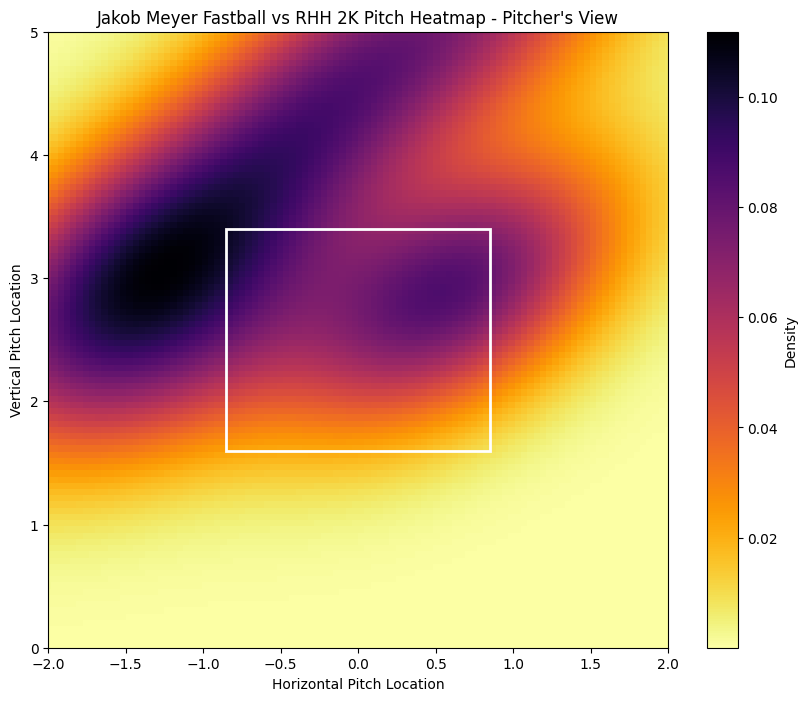

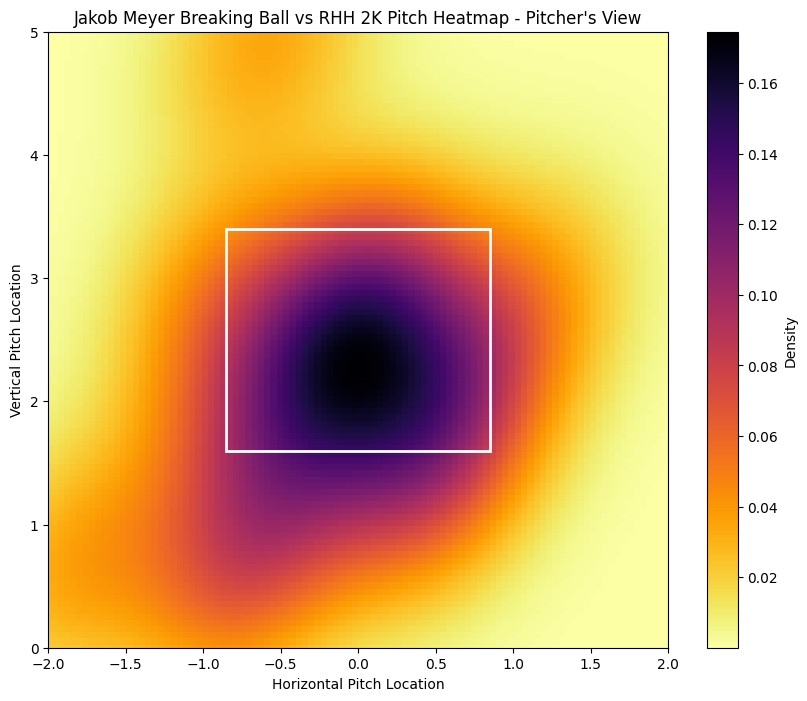

LinAlgError: ignored

In [ ]:
get_all_pitch_heatmaps(df, pitcher_name, batter_handedness, p_count)

In [ ]:
pitcher_name

In [ ]:
start_pos= 3
stop_pos= 3

strikes = np.arange(start_pos-1, stop_pos, 1)
print(strikes)